# Unsupervised Learning Techniques for Customer Segmentation and Anomaly Detection


Step 1: Data Loading and Preprocessing
Load the dataset and perform basic exploratory data analysis (EDA) to understand the features.
Handle missing values and normalize/scale the data if necessary.

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alirezaai/customer-data")

print("Path to dataset files:", path)

100%|██████████| 340k/340k [00:00<00:00, 64.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/alirezaai/customer-data/versions/1


In [4]:
import pandas as pd
import numpy as np


In [9]:
import os
import pandas as pd
import kagglehub
from sklearn.preprocessing import StandardScaler

# Download the latest version of the dataset
path = kagglehub.dataset_download("alirezaai/customer-data")

# Get the dataset directory
dataset_dir = path
csv_files = [f for f in os.listdir(dataset_dir) if f.endswith('.csv')]

if not csv_files:
    raise FileNotFoundError("No CSV files found in the dataset directory.")

# Load the first CSV file into a pandas DataFrame
data_file_path = os.path.join(dataset_dir, csv_files[0])
data = pd.read_csv(data_file_path)

# EDA
print("Path to dataset files:", dataset_dir)
print("First 5 rows of the dataset:")
print(data.head())
print("\nSummary statistics:")
print(data.describe(include='all'))  # Include all columns for summary statistics

# Identify numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = data.select_dtypes(include=['object']).columns

# Handle missing values for numeric columns
data[numeric_cols].fillna(data[numeric_cols].mean(), inplace=True)  # Fill with mean for numeric columns

# Handle missing values for non-numeric columns (using mode in this case)
for col in non_numeric_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)  # Fill with mode for categorical columns

# Normalization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_cols])  # Scale only numeric data

# Convert back to DataFrame for easier manipulation
data_scaled = pd.DataFrame(data_scaled, columns=numeric_cols)

# Display the first few rows of the scaled data
print("\nScaled Data (numeric columns):")
print(data_scaled.head())



Path to dataset files: /root/.cache/kagglehub/datasets/alirezaai/customer-data/versions/1
First 5 rows of the dataset:
   CUSTID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMEN

<ipython-input-9-605db2adae2c>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numeric_cols].fillna(data[numeric_cols].mean(), inplace=True)  # Fill with mean for numeric columns
<ipython-input-9-605db2adae2c>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)  # Fill with mode for cate

NaN values found in scaled data, replacing with 0.


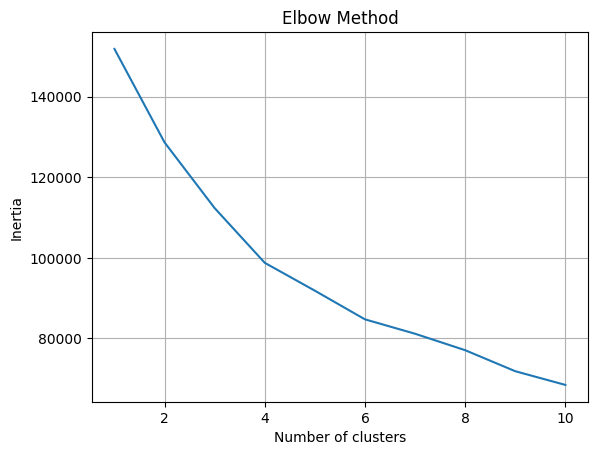


Data with Cluster Labels:
   CUSTID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1        

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Make sure there are no NaN values in the scaled data
# Replacing NaNs in the scaled data if any remain after the previous fillna calls
if np.any(np.isnan(data_scaled)):
    print("NaN values found in scaled data, replacing with 0.")
    data_scaled = np.nan_to_num(data_scaled)  # Replace NaNs with 0 or you can use another strategy

# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)  # Add random_state for reproducibility
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# Fit K-means with the optimal number of clusters
optimal_k = 3  # Adjust based on the elbow method results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Display the first few rows of the dataset with cluster labels
print("\nData with Cluster Labels:")
print(data.head())



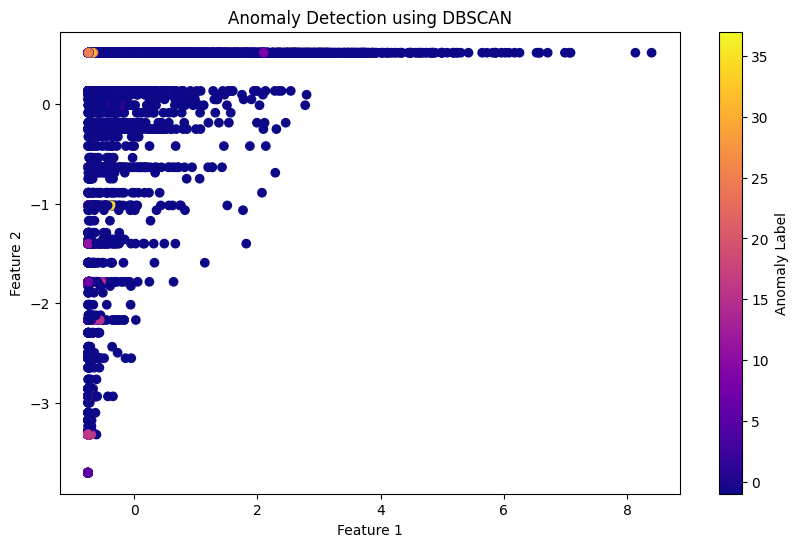

In [12]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Applying DBSCAN for anomaly detection
# Using the scaled data for DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['Anomaly'] = dbscan.fit_predict(data_scaled)

# Visualizing the anomalies
# Check if we have at least two features for plotting
if data_scaled.shape[1] >= 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=data['Anomaly'], cmap='plasma')
    plt.title('Anomaly Detection using DBSCAN')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Anomaly Label')
    plt.show()
else:
    print("Not enough features for visualization.")


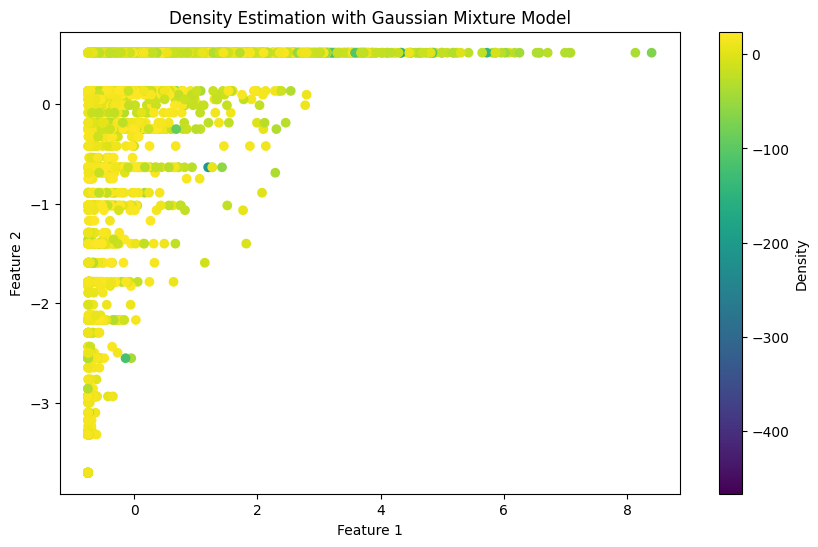

In [13]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Fitting a Gaussian Mixture Model using the scaled data
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm.fit(data_scaled)

# Predicting probabilities (density) for each cluster
data['Density'] = gmm.score_samples(data_scaled)

# Visualizing density estimation
# Check if we have at least two features for plotting
if data_scaled.shape[1] >= 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=data['Density'], cmap='viridis')
    plt.title('Density Estimation with Gaussian Mixture Model')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Density')
    plt.show()
else:
    print("Not enough features for visualization.")
